<a href="https://colab.research.google.com/github/alan-chen-lab/MNIST/blob/main/MNIST%E6%89%8B%E5%AF%AB%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **MNIST手寫辨識 : MLP**

11501568/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 - 4s - loss: 0.3770 - accuracy: 0.8855 - val_loss: 0.1480 - val_accuracy: 0.9538 - 4s/epoch - 8ms/

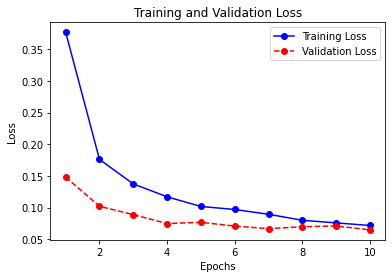

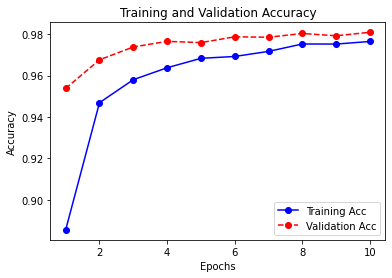

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 將 28*28 圖片轉換成 784 的向量
X_train = X_train.reshape(X_train.shape[0], 28*28).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28*28).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
X_test = X_test / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
# 定義模型
model = Sequential()
model.add(Dense(256, input_dim=28*28, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                    epochs=10, batch_size=128, verbose=2)
# 評估模型
print("\nTesting ...")
score = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = ", score[1])
print("訓練資料集的損失度 = ", score[0])
score1 = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = ", score1[1])
print("測試資料集的損失度 = ", score1[0])
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()





---


**MNIST 手寫數字分類：CNN**








x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/10
469/469 - 130s - loss: 0.2147 - accuracy: 0.9340 - val_loss: 0.0473 - val_accuracy: 0.9852 - 130s/epoch - 277ms/step
Epoch 2/10
469/469 - 129s - loss: 0.0770 - accuracy: 0.9771 - val_loss: 0.0346 - val_accuracy: 0.9887 - 129s/epoch - 275ms/step
Epoch 3/10
469/469 - 129s - loss: 0.0588 - accuracy: 0.9822 - val_loss: 0.0313 - val_accuracy: 0.9895 - 129s/epoch - 275ms/step
Epoch 4/10
469/469 - 127s - loss: 0.0481 - accuracy: 0.9849 - val_loss: 0.0302 - val_accuracy: 0.9900 - 127s/epoch - 272ms/step
Epoch 5/10
469/469 - 127s - loss: 0.0418 - accuracy: 0.9868 - val_loss: 0.0308 - val_accuracy: 0.9896 - 127s/epoch - 271ms/step
Epoch 6/10
469/469 - 127s - loss: 0.0357 - accuracy: 0.9882 - val_loss: 0.0262 - val_accuracy: 0.9918 - 127s/epoch - 271ms/step
Epoch 7/10
469/469 - 127s - loss: 0.0312 - accuracy: 0.9899 - val_loss: 0.0309 - val_accuracy: 0.9899 - 127s/epoch - 271ms/step
Epoch 8/10
469/469 - 127s - los

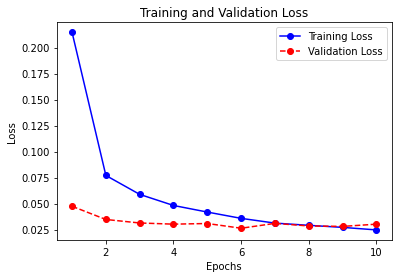

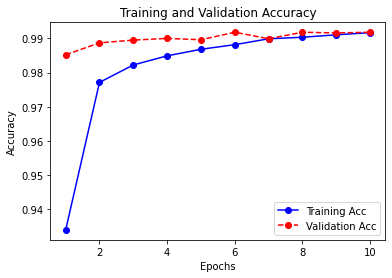

In [4]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras.utils import to_categorical

batch_size = 128
num_classes = 10
epochs = 10

# 輸入圖像尺寸
img_rows, img_cols = 28, 28

# 數據(分為訓練和測試集，x:loss y:acc)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# 將類向量轉換為二進制類矩陣
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))
#評估模型
print("\nTesting ...")
score = model.evaluate(x_train, y_train, verbose=0)
print("訓練資料集的準確度 = ", score[1])
print("訓練資料集的損失度 = ", score[0])
score = model.evaluate(x_test, y_test, verbose=0)
print("測試資料集的準確度 = ", score1[1])
print("測試資料集的損失度 = ", score1[0])

#顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**MNIST手寫數字分類：RNN**